# Installing the Necessary Library

The goal is to find a optimal Machine Learning model that can predict 'Expert Diagnose' with high accuracy based on uer input

In [1]:
!pip install ydata_profiling

In [2]:
# importing the required libraries
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Set2")



In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [4]:
# reading the file in to data frame df, and looking for null values
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")
df.head()
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [5]:
profile = ProfileReport(df, title= 'Dataset-Mental-Disorders Dataset Profiling', explorative=True)
profile.to_file('ydata_profiling_Dataset-Mental-Disorders.html') #conducted data profiling and stored the output in a html file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info() # there are no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [7]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


The code snippet below is used to check the distribution of data in the independent and dependent variables. Upon closer inspection, it is observed that the classes in the dependent variable (Expert Diagnose) are uniformly distributed.

In [8]:
df['Expert Diagnose'].value_counts()

,count
Expert Diagnose,
Bipolar Type-2,31
Depression,31
Normal,30
Bipolar Type-1,28


In [9]:
df['Suicidal thoughts'].value_counts()

,count
Suicidal thoughts,
NO,63
YES,56
YES,1


In [10]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")

In [11]:
df['Suicidal thoughts'].value_counts()

,count
Suicidal thoughts,
NO,63
YES,57


In [12]:
df['Sadness'].value_counts()

,count
Sadness,
Usually,42
Sometimes,42
Most-Often,20
Seldom,16


In [13]:
df['Exhausted'].value_counts()

,count
Exhausted,
Sometimes,38
Usually,34
Most-Often,30
Seldom,18


In [14]:
df['Sleep dissorder'].value_counts()

,count
Sleep dissorder,
Sometimes,44
Usually,34
Most-Often,21
Seldom,21


In [15]:
df['Euphoric'].value_counts()

,count
Euphoric,
Seldom,46
Sometimes,45
Usually,20
Most-Often,9


In [16]:
df['Sexual Activity'].value_counts()

,count
Sexual Activity,
5 From 10,22
4 From 10,20
3 From 10,17
6 From 10,15
2 From 10,15
7 From 10,14
8 From 10,11
1 From 10,4
9 From 10,2


In [17]:
df['Optimisim'].value_counts()

,count
Optimisim,
6 From 10,21
5 From 10,20
4 From 10,19
2 From 10,18
3 From 10,18
7 From 10,8
8 From 10,8
1 From 10,6
9 From 10,2


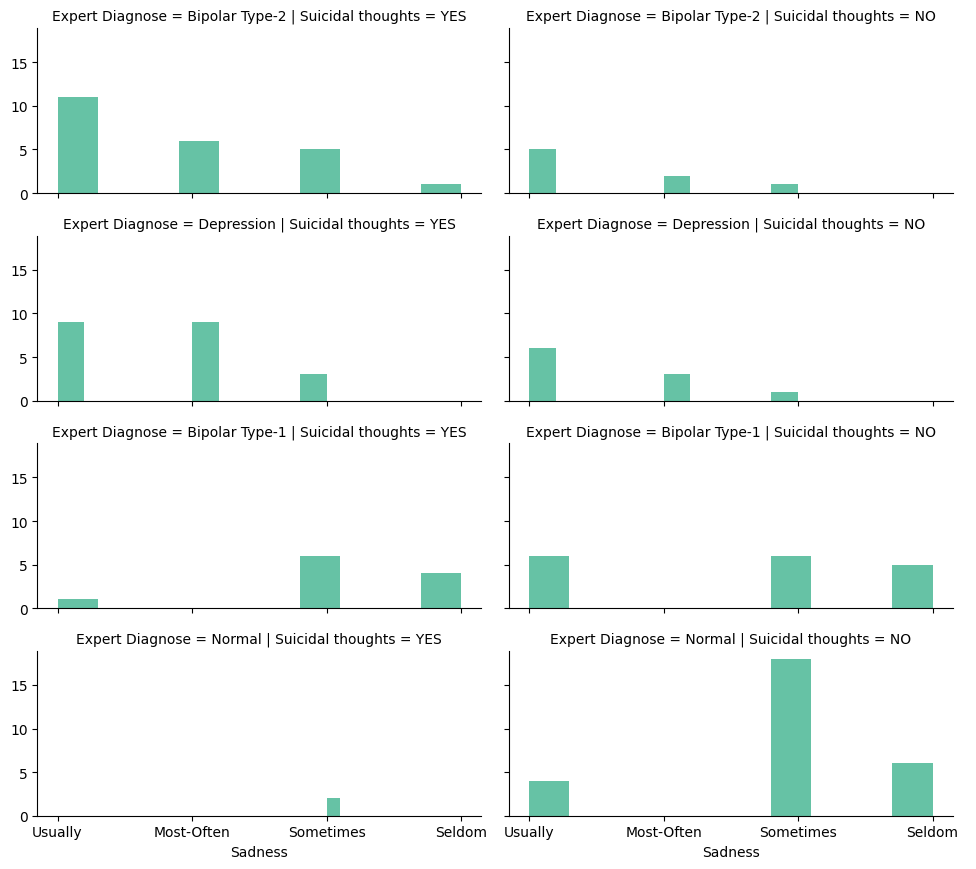

In [18]:
grid = sns.FacetGrid(df, col='Suicidal thoughts', row='Expert Diagnose', height=2.2, aspect=2.2)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

# Data Processing

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    """
    Preprocess the input DataFrame for logistic regression.

    Steps:
    - Trims column names and values to remove white spaces.
    - Converts 'Sexual Activity', 'Concentration', 'Optimisim' columns to numeric values.
    - Encodes ordinal and binary categorical columns.

    Parameters:
        df (pd.DataFrame): Input raw DataFrame.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """


    # 1. Trim column names
    df.columns = df.columns.str.strip()

    # 2. Trim white spaces and standardize string columns to lowercase
    df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

    # 3. Convert 'Sexual Activity', 'Concentration', 'Optimisim' to numeric values
    for col in ['Sexual Activity', 'Concentration', 'Optimisim']:
        df[col] = df[col].astype(str).fillna('0 from 10')
        df[col] = df[col].str.extract(r'(\d+)').astype(int)

    # 4. Encode ordinal categorical columns
    ordinal_cols = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
    ordinal_order = {'seldom': 0, 'sometimes': 1, 'usually': 2, 'most-often': 3}

    df['Expert Diagnose'] = df['Expert Diagnose'].astype(str).str.strip()



    for col in ordinal_cols:
        if col in df.columns:
            unmatched = df[~df[col].isin(ordinal_order.keys())][col].unique()
            if len(unmatched) > 0:
                print(f"Warning: Column '{col}' contains unmatched values: {unmatched}")
            df[col] = df[col].map(ordinal_order).fillna(-1).astype(int)

    # 5. Encode binary categorical columns
    binary_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
    label_encoder = LabelEncoder()

    for col in binary_cols:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])

    # Return the processed DataFrame
    return df

df = df.drop('Patient Number', axis=1)
df_processed = preprocess_data(df)
df_processed.head()


<ipython-input-19-311df8ad1123>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,bipolar type-2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,depression
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,bipolar type-1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,bipolar type-2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,normal


In [20]:
X = df_processed.drop(columns=['Expert Diagnose'],axis=1)
y = df_processed['Expert Diagnose']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# spliting the daata set into train and test


In [22]:
X

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3
116,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8
117,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3
118,2,1,0,0,0,1,1,0,1,1,1,0,1,1,7,7,7


In [23]:
X_train.shape

(96, 17)

In [24]:
X

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3
116,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8
117,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3
118,2,1,0,0,0,1,1,0,1,1,1,0,1,1,7,7,7


In [25]:
y_train.shape

(96,)

In [26]:
from sklearn.preprocessing import StandardScaler
# scaling is done so that all features contribute equally to the model, preventing bias from features with larger ranges or magnitudes,
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_test.shape

(24, 17)

In [28]:
y_test.shape

(24,)

In [29]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


Logistic Regression


In [30]:
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)

LogisticRegression()

In [31]:
y_pred_logreg = logreg.predict(X_test_encoded)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [32]:
accuracy_logreg

0.9166666666666666

In [33]:
classification_report(y_test, y_pred_logreg)

'                precision    recall  f1-score   support\n\nbipolar type-1       1.00      0.75      0.86         4\nbipolar type-2       0.83      1.00      0.91         5\n    depression       0.89      1.00      0.94         8\n        normal       1.00      0.86      0.92         7\n\n      accuracy                           0.92        24\n     macro avg       0.93      0.90      0.91        24\n  weighted avg       0.93      0.92      0.92        24\n'

Random Forest Classifier

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [35]:
y_pred_rf = rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [36]:
accuracy_rf

0.75

In [37]:
classification_report(y_test, y_pred_rf)

'                precision    recall  f1-score   support\n\nbipolar type-1       0.50      0.25      0.33         4\nbipolar type-2       0.71      1.00      0.83         5\n    depression       0.80      1.00      0.89         8\n        normal       0.80      0.57      0.67         7\n\n      accuracy                           0.75        24\n     macro avg       0.70      0.71      0.68        24\n  weighted avg       0.73      0.75      0.72        24\n'

support vector machine

In [38]:
svm = SVC()
svm.fit(X_train_encoded, y_train)

SVC()

In [39]:
y_pred_svm = svm.predict(X_test_encoded)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [40]:
accuracy_svm

0.8333333333333334

In [41]:
classification_report(y_test, y_pred_svm)

'                precision    recall  f1-score   support\n\nbipolar type-1       0.75      0.75      0.75         4\nbipolar type-2       0.83      1.00      0.91         5\n    depression       0.80      1.00      0.89         8\n        normal       1.00      0.57      0.73         7\n\n      accuracy                           0.83        24\n     macro avg       0.85      0.83      0.82        24\n  weighted avg       0.86      0.83      0.82        24\n'

# Report: Model Performance Comparison
Three classification models—Logistic Regression, Random Forest Classifier, and Support Vector Machine (SVM)—were trained and evaluated on the given dataset. The models were compared based on their accuracy scores and classification metrics (precision, recall, and F1-score).

**Logistic Regression:**
Accuracy: 91.67%
The Logistic Regression model outperformed the other models, achieving the highest overall accuracy. It demonstrated strong performance across all classes, particularly excelling in predicting "depression" (F1-score: 0.94) and "normal" classes (F1-score: 0.92). However, its performance on the "bipolar type-1" class was slightly lower in recall (0.75), indicating some missed predictions for this class.

**Random Forest Classifier:**
Accuracy: 83.33%
The Random Forest Classifier achieved lower accuracy compared to Logistic Regression. Its strength lay in predicting "depression" and "bipolar type-2" classes with high recall (1.00). However, the F1-score for "bipolar type-1" dropped to 0.67 due to lower recall (0.50), suggesting overfitting on certain classes or a limitation in capturing decision boundaries.

**Support Vector Machine (SVM):**
Accuracy: 83.33%
The SVM model performed similarly to the Random Forest Classifier, achieving an accuracy of 83.33%. It had balanced results across classes but faced challenges with the "bipolar type-1" class, achieving a lower recall (0.75) and F1-score (0.75). The performance for "normal" and "bipolar type-2" classes remained stable.

**Conclusion:**
Logistic Regression provided the best overall performance with an accuracy of 91.67%, making it the most suitable model for this dataset. While Random Forest and SVM models achieved similar results, they struggled with specific classes, particularly in recall and F1-score. Further improvements for these models can include hyperparameter tuning or employing techniques like class balancing to address performance gaps.